C:\Users\cl922f\AppData\Local\Temp\ipykernel_27540\976806017.py:110: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Query = pd.read_sql_query(query,conn)
C:\Users\cl922f\AppData\Local\Temp\ipykernel_27540\976806017.py:205: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MGMT = pd.read_sql_query(MNGR_HIERARCHY,conn2)


     BEMSID                    Name SEC_USER_ID SHIFT_CODE  \
0    100250   MARTIN CHARLES PETTIS     mcp6322         1    
1    100250   MARTIN CHARLES PETTIS      uh841a         1    
2    101208  JEFFREY HARRIS EVERETT     jhe5199         2    
3    101269         MICHELLE L PETZ      zu941a         1    
4    102200           KEITH  BENSON      ue151a         1    
..      ...                     ...         ...        ...   
931   95500    GREGORY ALLAN NORTON     gan7982         3    
932   95803          STEVEN E WOODS      ts141a         1    
933   96035      DANIEL DEAN DETTON     ddd4530         1    
934  994825  BILLY ALBERT PRICER-JR      nq174b         2    
935  997880     CATALIN  DUMITRESCU        None       None   

                    MGR_Name              MGR_BEMS              LVL_2_Name  \
0      SCOTT EDWARD SHERIDAN  2215002                      DANIEL H NGUYEN   
1      SCOTT EDWARD SHERIDAN  2215002                      DANIEL H NGUYEN   
2        JOSHUA A SON

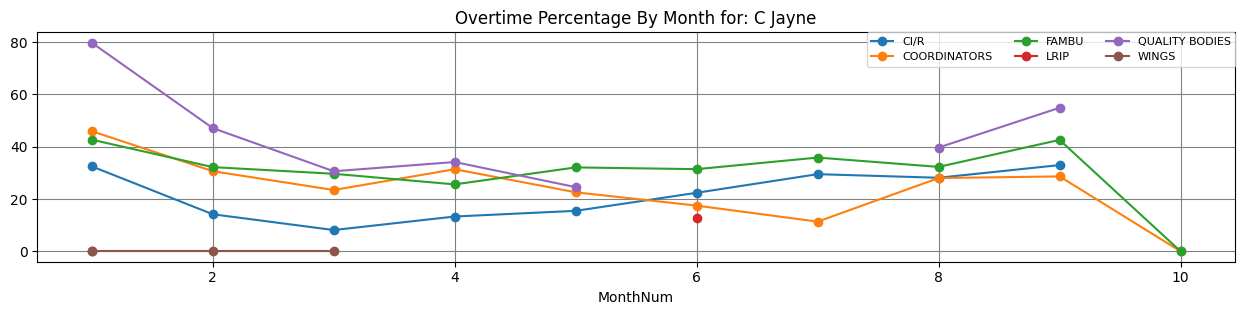

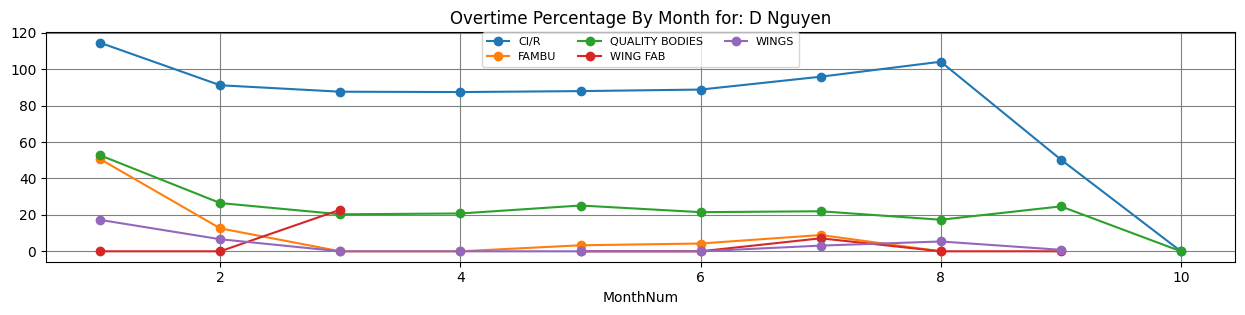

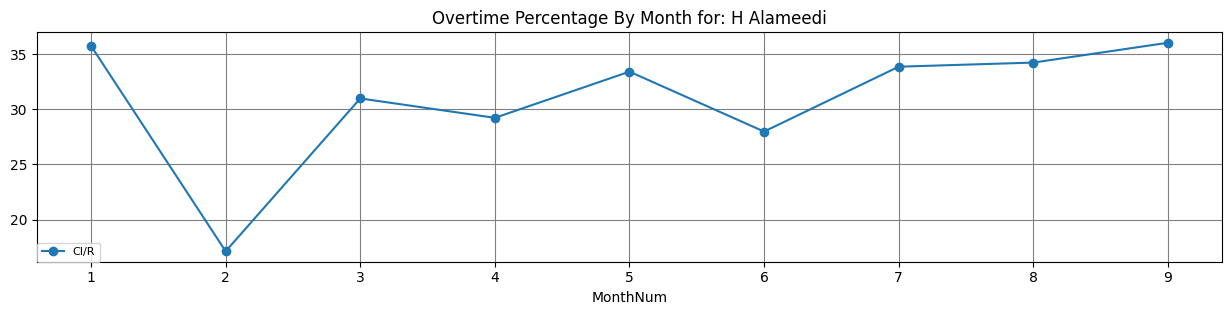

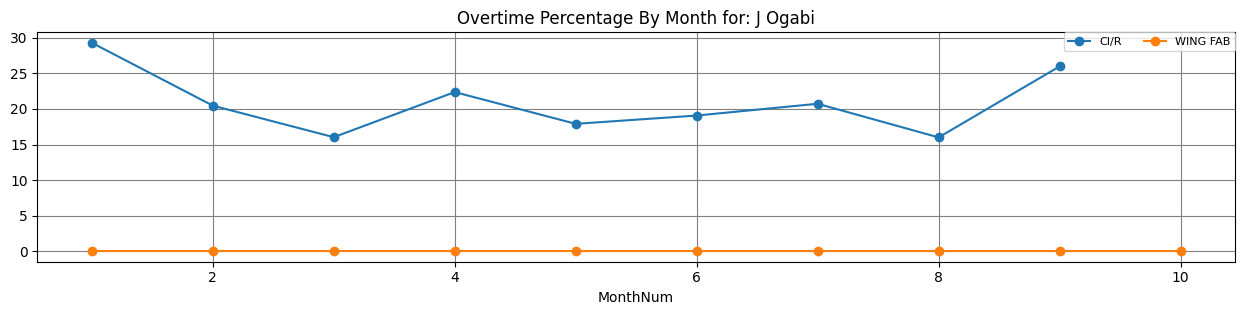

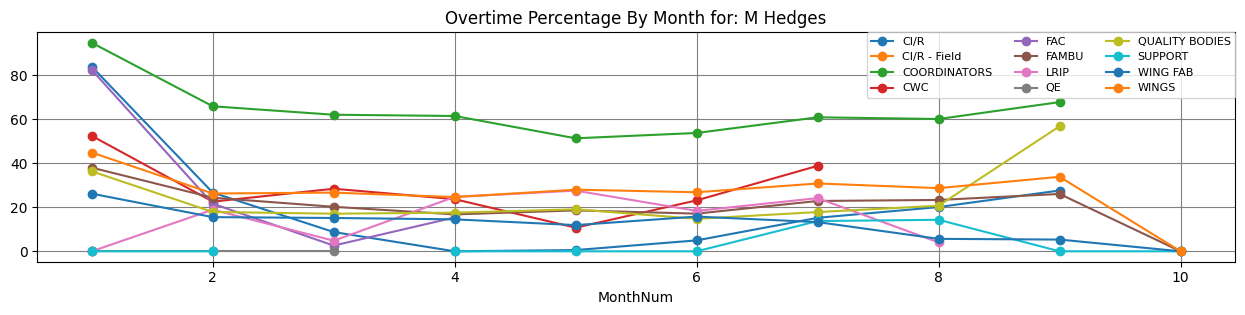

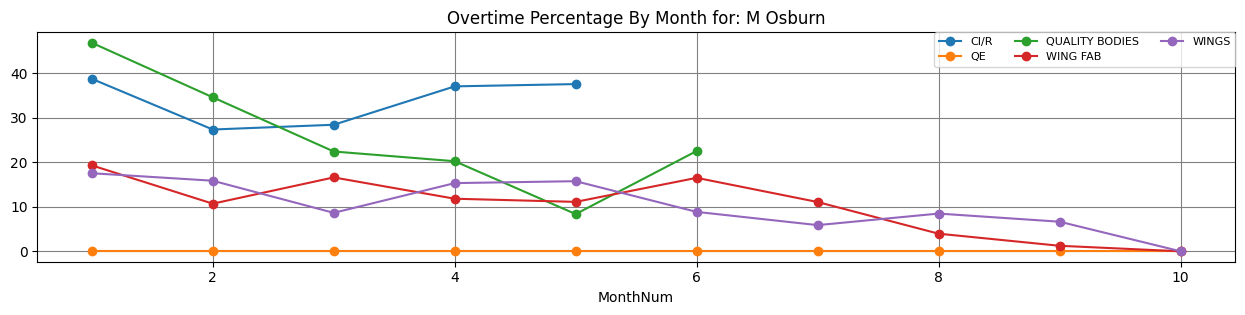

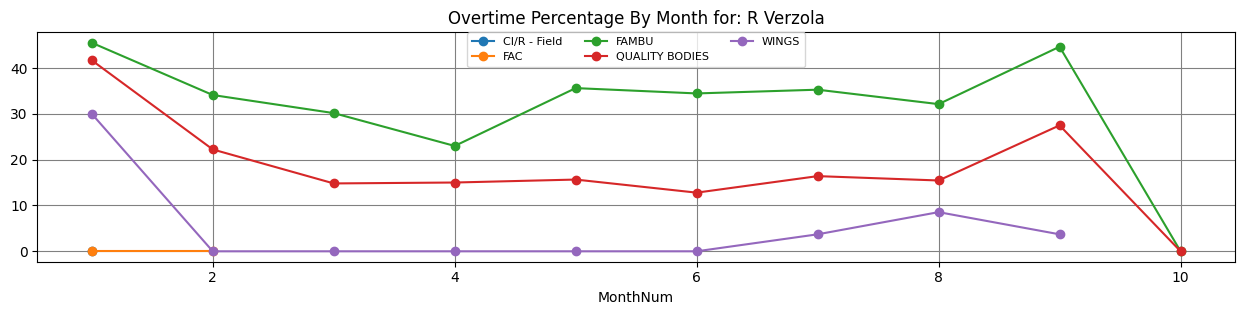

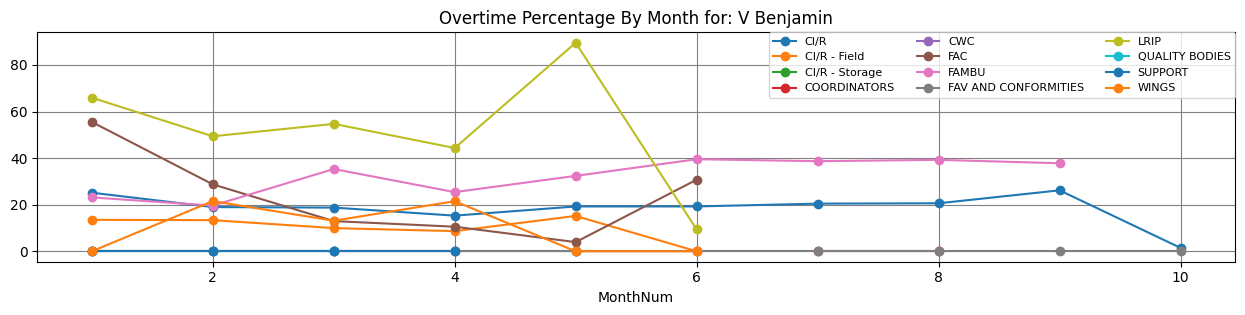

In [1]:
import datetime as dt
import plotly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
import seaborn as sns
import sqlalchemy as sa
from sqlalchemy import create_engine
from openpyxl.utils.dataframe import dataframe_to_rows
pd.options.display.max_columns = None
#import datetime as dt
import os
import teradatasql
import pathlib
#from pathlib import path
#import win32com.client
import datetime
from  datetime import date
import socket
import sys
from PIL import Image

#EFBI -prod2
Username = 'EFBIQVD'
Server = 'teraprd2.ca.boeing.com'
Password = 'WX2mdyAb8oc26YV9s7Hn'
conn = teradatasql.connect(host=Server, user=Username, password=Password)

#prod1
Q_Username = 'TDQ1160'
Q_Server = 'teraprd1.ca.boeing.com'
Password = 'WX2mdyAb8oc26YV9s7Hn'
conn2 = teradatasql.connect(host=Q_Server, user=Q_Username, password=Password)


# %% [markdown]
# # Overtime percentage
# ### This query pulls from EFBI for the overtime percentage of all employees of a certain organization in a quarter

# %%
#Overtime percentage
query = '''SELECT bems_id BEMSID,
    MBU,
    bus_unit_gl_cd,
    wrk_acctg_loc_cd,
    acctg_dept_id,
    fisc_mth_nbr,
    sum(ot_hrs),
    sum(reg_hrs),
    sum(hrs_qty),
    trunc((sum(ot_hrs)/sum(reg_hrs)) * 100, 2) perc_ot
FROM
(SELECT bems_id,
        wrk_acctg_loc_cd,
        acctg_dept_id,
        bus_unit_gl_cd,
        hrs_qty,
        type_cd,
        fisc_mth_nbr,
        CASE
            WHEN ets_trans.type_cd = 'OT' THEN to_char(hrs_qty)
            ELSE to_char(0)
        END AS ot_hrs,
        CASE
            WHEN ets_trans.type_cd = '' THEN to_char(hrs_qty)
            ELSE to_char(0)
        END AS reg_hrs,
        CASE
            WHEN ets_trans.acctg_dept_id IN ('6809','6810', '6812', 'WX12','W318', 'W319', 'W335', 'W336', 'WX12', 'W318', 'W319','W335','W336', 'B314', 'B315') THEN 'WINGS'
            WHEN ets_trans.acctg_dept_id IN ('6811') THEN 'QUALITY BODIES'
            WHEN ets_trans.acctg_dept_id IN ('6813') THEN 'WING FAB'
            WHEN ets_trans.acctg_dept_id IN ('6814','L351', 'FL02', 'FL03', 'FL04', 'L315', 'L316', 'L320', 'L323' 'L351') THEN 'LRIP'
            WHEN ets_trans.acctg_dept_id IN ('6816') THEN 'ENGINEERING'
            WHEN ets_trans.acctg_dept_id IN ('6818') THEN 'FAV AND CONFORMITIES'
            WHEN ets_trans.acctg_dept_id IN ('6819') THEN 'LOAN OUT'
            WHEN ets_trans.acctg_dept_id IN ('6911') THEN 'COORDINATORS'
            WHEN ets_trans.acctg_dept_id IN ('6912') THEN 'QE'
            WHEN ets_trans.ACCTG_DEPT_ID IN ('3001', '3003', '300A','300X','30H0', '6601', '681Z','7512','999X','B001','BX10','F001','F002','F00M','F00N',
            'F00R','FX02','SX01', 'SX02','SX03', 'SX11', 'SX12', 'SX14', 'W001','W002') THEN 'SUPPORT'
            WHEN ets_trans.acctg_dept_id IN ('6937', 'F335', 'F336', 'F32X','F330','F335','F337', 'F323','B351', 'F310', 'F316', 'F320') THEN 'FAMBU'
            WHEN ets_trans.ACCTG_DEPT_ID IN ('6817') THEN 'CI/R'
            WHEN ETS_TRANS.ACCTG_DEPT_ID IN ('R340') THEN 'CI/R - Field' 
            WHEN ETS_TRANS.ACCTG_DEPT_ID IN ('FL03') THEN 'CI/R - Factory'
            WHEN ets_trans.ACCTG_DEPT_ID IN ('R333') THEN 'CI/R - Storage'
            WHEN ets_trans.ACCTG_DEPT_ID IN ('B310', 'B316', 'F338', 'FA01', 'FA03', 'FA05', 'W358') THEN 'FAC'
            WHEN ets_trans.ACCTG_DEPT_ID IN ('W328', 'WX41', 'WX43', 'WX42','WX46', 'WX44', 'WX11','WX14', 'W328','W329', 'WX12', 'WX13') THEN 'CWC'
            ELSE 'other'
        END AS MBU
FROM efbi_prod_direct_access_iv.ets_ets_trans ets_trans
LEFT JOIN efbi_prod_direct_access_iv.efbi_d_calendar_01 ON (efbi_d_calendar_01.acctg_dt = ets_trans.acctg_dt)
WHERE ets_trans.wrk_acctg_loc_cd = 'CU'
    AND ets_trans.type_cd IN ('OT',
                            '')
    AND ets_trans.rec_del_ind NOT IN ('x',
                                    'R')
    AND efbi_d_calendar_01.fisc_yr_nbr = year(CURRENT_DATE)) a
GROUP BY a.bems_id,
        a.mbu,
        a.bus_unit_gl_cd,
        a.wrk_acctg_loc_cd,
        a.acctg_dept_id,
        a.fisc_mth_nbr
HAVING sum(hrs_qty) > 0
AND sum(reg_hrs) > 0
ORDER BY a.bems_id,
        a.fisc_mth_nbr'''


Query = pd.read_sql_query(query,conn)


# %% [markdown]
# ## Management Chain based on the hierarchy from individual contributor through director

# %%
#Management Chain
MNGR_HIERARCHY =  ''' SELECT distinct trim(LVL1.BEMS_ID) BEMSID 
    , concat(nvl(LVL1.FIRST_NAME,''),' ',nvl(LVL1.MIDDLE_NAME,''),' ',nvl(LVL1.Last_NAME,'')) as Name
, SU.SEC_USER_ID 
, LVL1.shift_code
    , concat(nvl(LVL2.FIRST_NAME,''),' ',nvl(LVL2.MIDDLE_NAME,''),' ',nvl(LVL2.Last_NAME,'')) as MGR_Name
, LVL2.BEMS_ID  as MGR_BEMS
, concat(nvl(LVL3.FIRST_NAME,''),' ',nvl(LVL3.MIDDLE_NAME,''),' ',nvl(LVL3.Last_NAME,'')) as LVL_2_Name
, LVL3.BEMS_ID  as MGR_2_BEMS
, concat(nvl(LVL4.FIRST_NAME,''),' ',nvl(LVL4.MIDDLE_NAME,''),' ',nvl(LVL4.Last_NAME,'')) as Director_Name
    , LVL4.BEMS_ID  as Director_BEMS,
CASE
                WHEN MNGR_CHAIN LIKE ('%|3413144|%') THEN 'K Olion'
                WHEN MNGR_CHAIN LIKE ('%|235841|%') THEN 'V Benjamin'
                WHEN MNGR_CHAIN LIKE ('%|2158474|%') THEN 'A Micheals'
                WHEN MNGR_CHAIN LIKE ('%|83372|%') THEN 'M Hedges'
                WHEN MNGR_CHAIN LIKE ('%|2124950|%') THEN 'H Alameedi'
                WHEN MNGR_CHAIN LIKE ('%|1770996|%') THEN 'D Nguyen'
                WHEN MNGR_CHAIN LIKE ('%|101906|%') THEN 'M Noble'
                WHEN MNGR_CHAIN LIKE ('%|2252518|%') THEN 'J Ogabi'
                WHEN MNGR_CHAIN LIKE ('%|2201403|%') THEN 'C Vanderaway'
                --WHEN MNGR_CHAIN LIKE ('%|1670248|%') THEN 'D Johnson'
                WHEN MNGR_CHAIN LIKE ('%|122802|%') THEN 'R Verzola'
                WHEN MNGR_CHAIN LIKE ('%|2124327|%') THEN 'M Osburn'
                WHEN MNGR_CHAIN LIKE ('%|2163109|%') THEN 'C Jayne'
                ELSE 'OTHER'
                END AS Quality_Mngr
    
,concat( 
nvl(trim(LVL1.BEMS_ID),''), '|',
nvl(trim(LVL2.BEMS_ID),''),'|',
nvl(trim(LVL3.BEMS_ID),''),'|',
nvl(trim(LVL4.BEMS_ID),''),'|',
nvl(trim(LVL5.BEMS_ID),''),'|',
nvl(trim(LVL6.BEMS_ID),''),'|',
nvl(trim(LVL7.BEMS_ID),''),'|',
nvl(trim(LVL8.BEMS_ID),''),'|',
nvl(trim(LVL9.BEMS_ID),''),'|',
nvl(trim(LVL10.BEMS_ID),''),'|',
nvl(trim(LVL11.BEMS_ID),''),'|',
nvl(trim(LVL12.BEMS_ID),'')) as MNGR_CHAIN

FROM 
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL1
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL2
    ON (LVL2.BEMS_ID = LVL1.MGR_BEMS_ID_C
and
lvl1.FIRST_NAME is not null)
    
left join NCMV.SEC_USER SU on
SU.SEC_USER_BEMS_ID = LVL1.BEMS_ID
    
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL3
    ON (LVL3.BEMS_ID = LVL2.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL4
    ON (LVL4.BEMS_ID = LVL3.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL5
    ON (LVL5.BEMS_ID = LVL4.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL6
    ON (LVL6.BEMS_ID = LVL5.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL7
    ON (LVL7.BEMS_ID = LVL6.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL8
    ON (LVL8.BEMS_ID = LVL7.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL9
    ON (LVL9.BEMS_ID = LVL8.MGR_BEMS_ID_C)
    inner JOIN
OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL10
    ON (LVL10.BEMS_ID = LVL9.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL11
    ON (LVL11.BEMS_ID = LVL10.MGR_BEMS_ID_C)
    inner JOIN
    OWI_INT_INQ_VW.BIQFD_EMPLOYEE_INFO_DATA LVL12
    ON (LVL12.BEMS_ID = LVL11.MGR_BEMS_ID_C)
WHERE Quality_Mngr <> 'OTHER' '''



#MGMT = create_DF_from_SQL(MNGR_HIERARCHY, Q_Username, Password, Q_Server)
MGMT = pd.read_sql_query(MNGR_HIERARCHY,conn2)
#print(MGMT)

# %% [markdown]
# ### Create a data frame that merges the management chain to the overtime query on BEMSID. Rename the discal month column to laymen term 'Month number' and then drop unneeded columns

# %%
OT_df = Query.merge(MGMT, on= 'BEMSID')
OT_df = OT_df.rename(columns={'FISC_MTH_NBR': 'MonthNum'})
OT_df = OT_df.drop(columns = ['SEC_USER_ID', 'SHIFT_CODE'])
OT_df = OT_df.drop_duplicates()

# %% [markdown]
# ## Overtime (OT) Percentage Line Graph
# #### truncate the data frame to only include the columns needed and then group them by the aggregate columns. The loop that follows loops over every manager listed in the data frame to produce a line chart that displays the averaged overtime percentage based on each individual in their management chain, and the place where that OT was clocked

# %%
#OT Percent Chart

OTperc_df = OT_df[['Quality_Mngr', 'MBU', 'MonthNum', 'ot_hrs','reg_hrs',  'HRS_QTY']]
OTperc_df = OTperc_df.groupby(['Quality_Mngr', 'MBU', 'MonthNum'],as_index=False).agg({'ot_hrs': 'sum', 'reg_hrs': 'sum', 'HRS_QTY' : 'sum'})
OTperc_df['OT Percent'] = OTperc_df.apply(lambda row: 100 * row['ot_hrs'] / row['reg_hrs'], axis=1)
OTperc_df.reset_index(inplace = True)

manager_names = OTperc_df['Quality_Mngr'].drop_duplicates()
manager_OTchrt = list()
for manager_name in manager_names:
    manager_data = OTperc_df[OTperc_df['Quality_Mngr'] == manager_name]
    ax = manager_data.set_index(['MonthNum','MBU'])['OT Percent'].unstack().plot(figsize=(12.55, 3.25),marker = ".", markersize = 12)
    ax.legend(ncol=3, fontsize=8, borderaxespad=0.)
    plt.grid(True, color = 'gray')
    plt.title(f'Overtime Percentage By Month for: {manager_name}')
    plt.tight_layout()
    label = f'static\\images\\{manager_name}_PercentOT.png'
    plt.savefig(label)
    manager_OTchrt.append(label) 
print (manager_OTchrt)